In [ ]:
# Import required libraries for data analysis and machine learning
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For creating plots and visualizations
from sklearn import linear_model , # For linear regression model
from sklearn.model_selection import train_test_split  # For splitting data into train/test sets
from sklearn.metrics import mean_squared_error, r2_score  # For evaluating model performance


In [3]:
# Load the dataset from CSV file
df = pd.read_csv('Rampur.csv')  # Read the CSV file into a pandas DataFrame
df = df.dropna()  # Remove rows containing missing values (NaN) and assign back to df
print("Dataset shape:", df.shape)  # Display the dimensions (rows, columns) of the dataset
print("\nFirst few rows:")  # Print a label for the next output
df.head()  # Display the first 5 rows of the dataset to see the data structure

Dataset shape: (7304, 9)

First few rows:


,Unnamed: 0,Unnamed: 1,Tmin,Rainfall,RH,Solar,Wind,Tmax,Discharge
0,1,1,1.1,15.6,0.52,12.01,3.50,6.7,96.1
1,2,2,0.6,8.0,0.23,14.78,4.09,7.8,93.5
2,3,3,1.1,0.0,0.37,14.55,4.12,11.1,93.2
3,4,4,6.1,0.0,0.43,11.57,2.75,14.4,90.7
4,5,5,3.3,0.0,0.33,14.29,4.02,16.1,90.7


In [4]:
# Prepare the data - using Tmax to predict Discharge
X = df[['Tmax']].values  # Extract Tmax column as feature (independent variable) and convert to numpy array
y = df['Discharge'].values  # Extract Discharge column as target (dependent variable) and convert to numpy array

print("X shape:", X.shape)  # Print the shape of feature array (number of samples, number of features)
print("y shape:", y.shape)  # Print the shape of target array (number of samples,)

X shape: (7304, 1)
y shape: (7304,)


In [5]:
# Split the data into training and testing sets
# X_train: features for training the model (80% of data)
# X_test: features for testing the model (20% of data)
# y_train: target values for training the model (80% of data)
# y_test: target values for testing the model (20% of data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape[0])  # Display number of training samples
print("Testing set size:", X_test.shape[0])  # Display number of testing samples

Training set size: 5843
Testing set size: 1461


In [6]:
# Create and train the linear regression model
model = linear_model.LinearRegression()  # Create a linear regression model object
model.fit(X_train, y_train)  # Train the model using training data (features and targets)

print("Model trained successfully!")  # Confirm that training is complete

Model trained successfully!


In [7]:
# Make predictions on the test set
y_pred = model.predict(X_test)  # Use the trained model to predict target values for test features

print("Predictions (y_pred):")  # Label for the predictions output
print(y_pred)  # Display all predicted discharge values
print(f"\nNumber of predictions: {len(y_pred)}")  # Show how many predictions were made

Predictions (y_pred):
[ -2.24169179  79.92107666 522.15009508 ... 481.06871085 159.66729309
 239.41350953]

Number of predictions: 1461


In [8]:
r = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R^2 Score: {r}")  # Print the R-squared score to evaluate model performance
print(f"Mean Squared Error: {mse}")  # Print the Mean Squared

R^2 Score: 0.30499438136689927
Mean Squared Error: 61423.92845616946


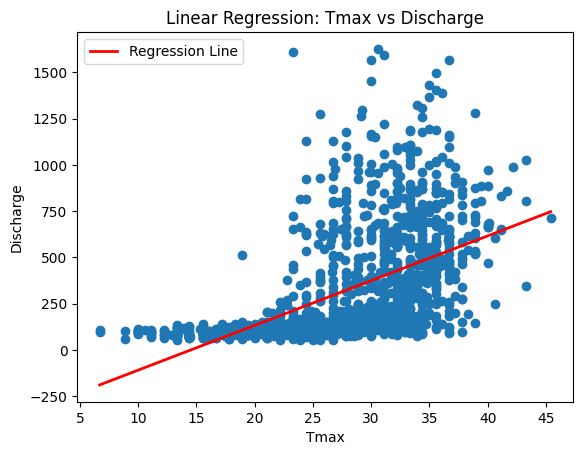

In [10]:
plt.scatter(X_test,y_test)
sorted_indices = np.argsort(X_test.flatten())
X_test_sorted = X_test[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Plot the regression line
plt.plot(X_test_sorted, y_pred_sorted, color='red', linewidth=2, label='Regression Line')

plt.xlabel('Tmax')
plt.ylabel('Discharge')
plt.title('Linear Regression: Tmax vs Discharge')
plt.legend()
plt.show()